<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [19]:
# type your code here
# type your code here
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'matplotlib.pyplot' 
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split
# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [18]:
!pip install mlxtend

#### Load the first dataset and check the first two observations

In [5]:
# load your data
# type your code here
df_wine=pd.read_csv('D:\\DataScience\\Material\\ML\\Day 2-2\\Day 2\\whitewine.csv',sep=';')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


In [3]:
# check data types of variables
# type your code here

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
#Normally distributed with bar plot whether skewed and then log transformation to be applied

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# Check skewness using boxplot
# Skewness reduced using either log ,min-max,square root,box-cox,reciprocal,cube transfrmationfrmation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# Need to check variance for the variable
#value less than 0.05 has no information
df_wine.var()

fixed acidity             0.712114
volatile acidity          0.010160
citric acid               0.014646
residual sugar           25.725770
chlorides                 0.000477
free sulfur dioxide     289.242720
total sulfur dioxide   1806.085491
density                   0.000009
pH                        0.022801
sulphates                 0.013025
alcohol                   1.514427
quality                   0.784356
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# Skewness reduced using either log ,min-max,square root,box-cox,reciprocal,cube transfrmation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

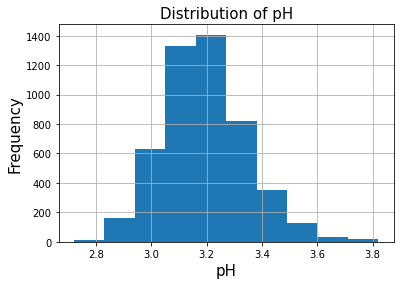

In [8]:
# plot histogram
df_wine.pH.hist()

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of pH', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('pH', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [7]:
# without scaling fit full model
# select all features of the data for full model
X = df_wine.iloc[:,:10]
# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_wine['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print model summary
print(MLR_model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     183.0
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:16:24   Log-Likelihood:                -5575.5
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4887   BIC:                         1.124e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  283.8571 

In [13]:
# import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler
# create the Scaler object
scaler = StandardScaler()

# fit your data on the scaler object
# we pass the column by converting into dataframe since fit_transform() requires a dataframe input
df_wine.pH = scaler.fit_transform(pd.DataFrame(df_wine.pH))

In [14]:
# select all features of the data for full model
X = df_wine.iloc[:,:10]

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_wine['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print model summary
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     183.0
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:21:09   Log-Likelihood:                -5575.5
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4887   BIC:                         1.124e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  287.5634 

In [ ]:
#R square same even after scaling,scaling not reqired

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
#VIF ,above 10 are correlated 
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# filter the numerical features in the dataset
# select_dtypes: selects the variable having specified datatype
df_numeric = df_wine.select_dtypes(include=[np.number])

# drop the target variable
# 'axis = 1' drops the specified column
df_numeric = df_numeric.drop("quality", axis = 1)

# create a column of variable names
vif["Features"] = df_numeric.columns

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF' to store the values 
vif["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# print the VIF
print(vif)

                Features        VIF
0          fixed acidity  91.821002
1       volatile acidity   9.728942
2            citric acid  10.006134
3         residual sugar   3.773564
4              chlorides   6.494994
5    free sulfur dioxide   9.263938
6   total sulfur dioxide  24.999146
7                density 288.405246
8                     pH   1.334860
9              sulphates  20.549226
10               alcohol 118.471497


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

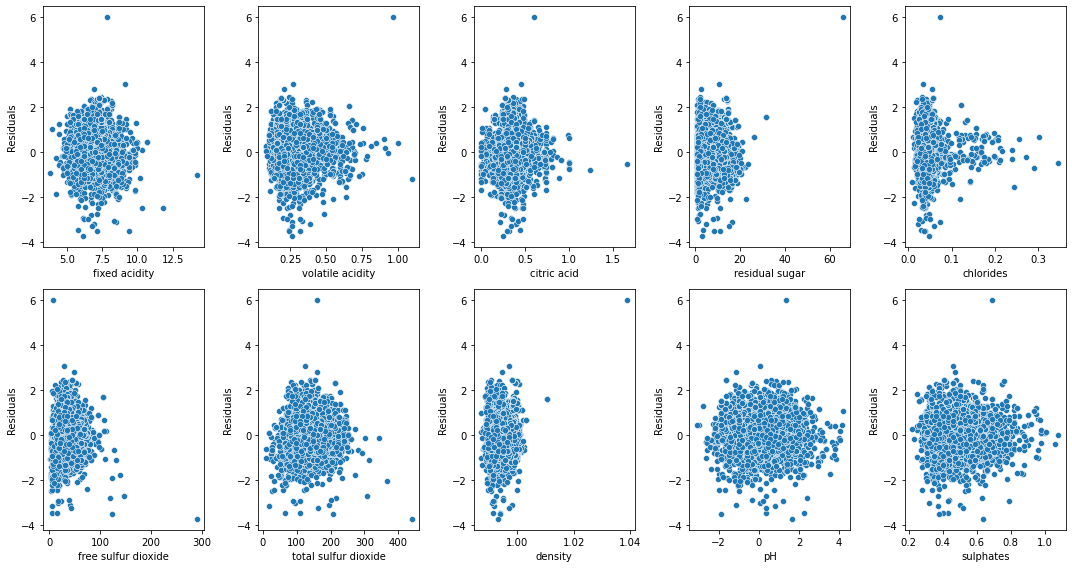

In [16]:
# type your code here
# select all features of the data for full model
X = df_wine.iloc[:,:10]

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_wine['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# capture residuals for the model
residuals = MLR_model.resid

# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 5, figsize=(15,8))

# use for loop to create scatter plot for residuals and each independent variable (do not cosider the intercept)
# 'ax' assigns axes object to draw the plot onto
# set_ylabel() is used to set label to y axis
for variable, subplot in zip(X.columns[1:], ax.flatten()):
    z = sns.scatterplot(X[variable], residuals , ax=subplot)
    z.set_ylabel("Residuals", fontsize = 10)

    
plt.tight_layout()
# display the plot
plt.show()

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# Forwrd selection:It takes check if significane if it takes or not it leaves
#Backward selection:It takes full model and check significance and remove it
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_wine.drop('quality', axis = 1)

# dependent variable
y = df_wine['quality']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg = LinearRegression()
# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '5' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 5, forward = True, verbose = 2, scoring = 'r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)
# print the selected feature names when k_features = 5
print('Features selelected using forward selection are: \n',sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_forward.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-04-11 10:46:09] Features: 1/5 -- score: 0.18565846860352717[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-04-11 10:46:10] Features: 2/5 -- score: 0.23629929361188456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-04-11 10:46:10] Features: 3/5 -- score: 0.2540012055405943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

Features selelected using forward selection are: 
 ('fixed acidity', 'volatile acidity', 'residual sugar', 'sulphates', 'alcohol')

R-squared:  0.2642089894983088


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-04-11 10:46:10] Features: 5/5 -- score: 0.2642089894983088

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build backward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 5, forward = False, verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-04-11 10:50:32] Features: 10/5 -- score: 0.2724755793957414[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-04-11 10:50:32] Features: 9/5 -- score: 0.2733208794070411[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-04-11 10:50:32] Features: 8/5 -- score: 0.2737752798323875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [23]:
# print the selected feature names when k_features = 5 
print('Features selelected using backward elimination are: \n', sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
 ('volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol')

R-squared:  0.26679342665419137


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here
linreg_backward = sfs(estimator = linreg, k_features = (2,6), forward = False, verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-04-11 10:53:58] Features: 10/2 -- score: 0.2724755793957414[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-04-11 10:53:58] Features: 9/2 -- score: 0.2733208794070411[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-04-11 10:53:58] Features: 8/2 -- score: 0.2737752798323875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [25]:
# print the selected feature names when k_features = 5 
print('Features selelected using backward elimination are: \n', sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
 ('volatile acidity', 'residual sugar', 'density', 'pH', 'sulphates', 'alcohol')

R-squared:  0.27246859850973654


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False, verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-04-11 10:55:06] Features: 10/1 -- score: 0.2724755793957414[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-04-11 10:55:06] Features: 9/1 -- score: 0.2733208794070411[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-04-11 10:55:07] Features: 8/1 -- score: 0.2737752798323875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [27]:
# print the selected feature names when k_features = 5 
print('Features selelected using backward elimination are: \n', sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
 ('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

R-squared:  0.27397516464601035


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# Build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 5)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['volatile acidity', 'chlorides', 'density', 'sulphates', 'alcohol'], dtype='object')


In [ ]:
#RFE,K-best,Chi-square test(done to find feature engineering)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here
# creating a function get_score that returns the R-squared score for the training set
# get_score takes 5 parameters
def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                # fit the model 
    return model.score(X_test_k, y_test_k)

In [30]:
# copying the original dataset
df_wine_copy = df_wine.copy()

# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_wine_copy.drop('quality', axis = 1)

# dependent variable
y = df_wine_copy['quality']

# split data into train subset and test subset using train_test_split()
# 'test_size' returns the proportion of data to be included in the testing set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [31]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter 
# e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(   estimator = LinearRegression(), 
                            X = X_train, 
                            y = y_train, 
                            cv = 2, 
                            scoring = 'r2',
                         )

In [32]:
# print all scores 
print('All scores: ', scores)  

# print the minimum score from the list 
# use 'round()' to round-off the minimum score upto 4 digits 
# min() returns minimum score  
print("\nMinimum score obtained: ", round(min(scores), 4)) 

# print the maximum score from the list 
# use 'round()' to round-off the maximum score upto 4 digits 
# max() returns maximum score  
print("Maximum score obtained: ", round(max(scores), 4))  

# print the average score from the list 
# use 'round()' to round-off the average score upto 4 digits 
# np.mean() returns average score  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.27935558 0.26833929]

Minimum score obtained:  0.2683
Maximum score obtained:  0.2794
Average score obtained:  0.2738


In [ ]:
#Good model for all folds score is same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
scores = cross_val_score(   estimator = LinearRegression(), 
                            X = X_train, 
                            y = y_train, 
                            cv = , 
                            scoring = 'r2',
                         )

In [34]:
# print all scores 
print('All scores: ', scores)  

# print the minimum score from the list 
# use 'round()' to round-off the minimum score upto 4 digits 
# min() returns minimum score  
print("\nMinimum score obtained: ", round(min(scores), 4)) 

# print the maximum score from the list 
# use 'round()' to round-off the maximum score upto 4 digits 
# max() returns maximum score  
print("Maximum score obtained: ", round(max(scores), 4))  

# print the average score from the list 
# use 'round()' to round-off the average score upto 4 digits 
# np.mean() returns average score  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.31454176 0.22902879 0.24729302 0.32222619 0.22591173]

Minimum score obtained:  0.2259
Maximum score obtained:  0.3222
Average score obtained:  0.2678


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# type your code here
# create an empty to store the MSE for each model
loocv_rmse = []

# instantiate the LOOCV method 
loocv = LeaveOneOut()

# use the for loop to build the regression model for each cross validation 
# use split() to split the dataset into two subsets; one with (n-1) data points and another with 1 data point
# where, n = total number of observations

for train_index, test_index in loocv.split(X_train):
    # create the train dataset, use iloc[] to retrieve the corresponding observations in train data
    # create the test dataset, use iloc[] to retrieve the corresponding observations in test data
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    linreg = LinearRegression()
    
    # fit the OLS model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate MSE using test dataset
    # use predict() to predict the values of target va
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)

In [41]:
# print the minimum rmse from the list 
# use 'round()' to round-off the minimum rmse upto 4 digits 
# min() returns minimum rmse  
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))  

# print the maximum rmse from the list 
# use 'round()' to round-off the maximum rmse upto 4 digits 
# max() returns maximum rmse  
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))  

# print the average rmse from the list 
# use 'round()' to round-off the average rmse upto 4 digits 
# np.mean() returns average rmse  
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.0
Maximum rmse obtained:  4.5966
Average rmse obtained:  0.5891
